<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Walt9819/blob/main/Week5/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [2]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.matmul(np.matmul(W, D), Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [3]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


### Ejemplos de PCA (descomposición y reconstrucción de matrices)

In [4]:
def PCADecompComp(A):
  # Calcula la eigendescomposición
  values, vectors = np.linalg.eig(A)

  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)

  # Calcula la reconstrucción A = W * D * Winv
  B = np.matmul(np.matmul(W, D), Winv)

  print(f"Matriz original:\n\n{A}\nEigenvalores:\n\n{values}\nEigenvectores:\n\n{W}\n\nMatriz reconstruida:\n\n{B}")

In [70]:
#Matriz 1
M1 = np.random.randint(low=0, high=10, size=(3, 3 )) # Create a random natural numbers matrix
PCADecompComp(M1) # Easy matrix to reconstruct

Matriz original:

[[3 1 5]
 [9 5 9]
 [5 7 8]]
Eigenvalores:

[17.34975634+0.j         -0.67487817+2.22766312j -0.67487817-2.22766312j]
Eigenvectores:

[[ 0.2804722 +0.j         -0.0085065 +0.57222092j -0.0085065 -0.57222092j]
 [ 0.69038104+0.j          0.59738076+0.j          0.59738076-0.j        ]
 [ 0.66686532+0.j         -0.36816717-0.42435836j -0.36816717+0.42435836j]]

Matriz reconstruida:

[[3.+1.46940462e-15j 1.-4.01192137e-16j 5.+4.32022720e-16j]
 [9.+2.92932976e-15j 5.-7.37685669e-16j 9.+1.11910113e-15j]
 [5.+2.59946562e-15j 7.-5.97546329e-16j 8.+7.63763123e-16j]]


In [73]:
#Matriz 2
M2 = np.random.randint(low=-10, high=10, size=(4, 4)) # Create a random integer number matrix
PCADecompComp(M2) # It can take any positive or negative integer (it has a little error rate at decimal precision)

Matriz original:

[[-4  5 -7  4]
 [-3 -9 -8 -7]
 [ 7  0 -1 -2]
 [ 8 -9 -2 -8]]
Eigenvalores:

[-18.9658401 +0.j          -1.86405327+8.21991612j
  -1.86405327-8.21991612j   0.69394665+0.j        ]
Eigenvectores:

[[ 0.29747611+0.j          0.57465827+0.j          0.57465827-0.j
   0.20573546+0.j        ]
 [-0.58200632+0.j          0.36667563+0.41847959j  0.36667563-0.41847959j
  -0.56491793+0.j        ]
 [-0.19724447+0.j          0.00788678-0.52370219j  0.00788678+0.52370219j
  -0.08760241+0.j        ]
 [-0.73066492+0.j         -0.13768281-0.25866764j -0.13768281+0.25866764j
   0.79427103+0.j        ]]

Matriz reconstruida:

[[-4.00000000e+00-1.07588523e-17j  5.00000000e+00+3.71056945e-16j
  -7.00000000e+00+9.75770435e-17j  4.00000000e+00+1.19371536e-16j]
 [-3.00000000e+00-3.79831148e-16j -9.00000000e+00+6.43553736e-17j
  -8.00000000e+00-2.20267016e-16j -7.00000000e+00-4.11747016e-17j]
 [ 7.00000000e+00+4.26366551e-16j -1.66533454e-15+6.24984269e-17j
  -1.00000000e+00+7.13270097e-16j -

In [74]:
#Matriz 3
M3 = np.random.random(size=(3, 3)) * 10 # Create a random real numbers matrix
PCADecompComp(M3) # It can easily work with any real number

Matriz original:

[[4.92990256 7.08205242 5.45288184]
 [9.15125841 0.72131899 0.25497454]
 [5.38660146 6.0254855  3.21985735]]
Eigenvalores:

[14.41041934 -4.11623378 -1.42310666]
Eigenvectores:

[[ 0.67565655  0.42697822  0.13915337]
 [ 0.46237605 -0.82699714 -0.67948501]
 [ 0.57419214  0.36573943  0.72037244]]

Matriz reconstruida:

[[4.92990256 7.08205242 5.45288184]
 [9.15125841 0.72131899 0.25497454]
 [5.38660146 6.0254855  3.21985735]]


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


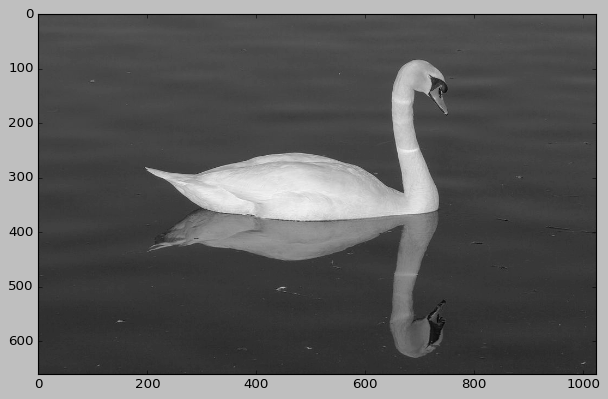

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FB0F366B850>


In [8]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [9]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [10]:
U.shape

(660, 660)

In [11]:
V.shape

(1024, 1024)

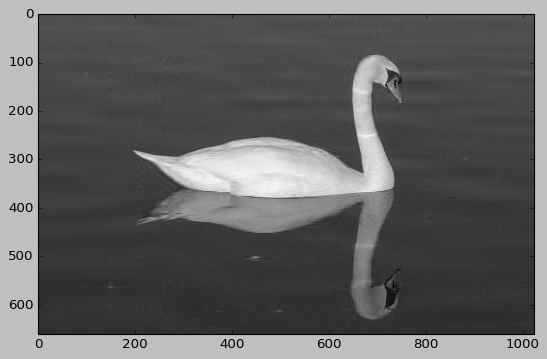

Felicidades la imagen está comprimida


In [12]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [40]:
def reconstructImage(image, nvalue):
  imggray = image.convert('LA')
  imgmat = np.array(list(imggray.getdata(band=0)),float)

  imgmat.shape = (imggray.size[1],imggray.size[0])

  plt.figure(figsize=(9,6))
  plt.imshow(imgmat,cmap='gray')
  plt.show()
  print(f"Imagen original: {image}")

  U,D,V = np.linalg.svd(imgmat)
  #------------------------------
  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  plt.figure(figsize=(9,6))
  plt.imshow(reconstimg,cmap='gray')
  plt.show()
  print(f"Imagen reconstruida con {nvalue} valores: {image}")

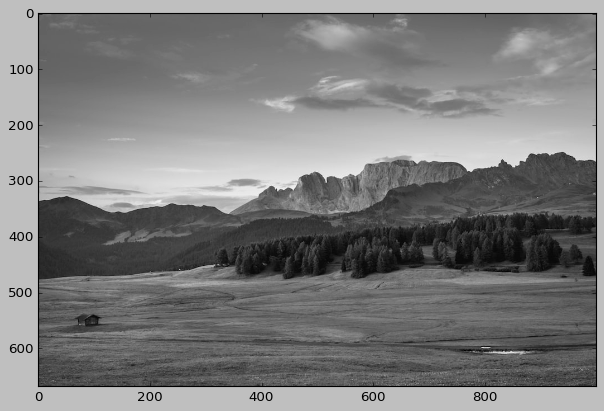

Imagen original: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x667 at 0x7FB0D7B6A750>


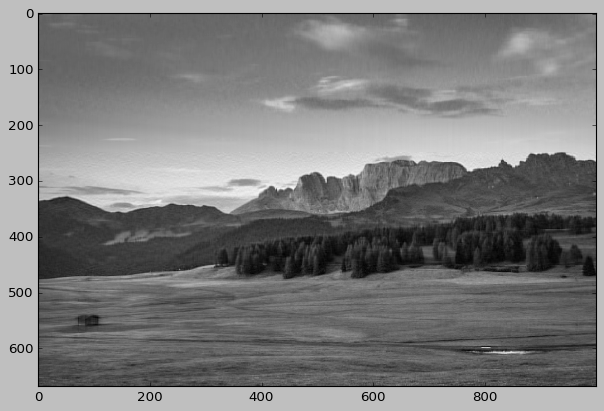

Imagen reconstruida con 80 valores: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1000x667 at 0x7FB0D7B6A750>


In [41]:
#imagen 1

img_1 = Image.open(urllib.request.urlopen('https://images.unsplash.com/photo-1484591974057-265bb767ef71?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxleHBsb3JlLWZlZWR8MXx8fGVufDB8fHx8&w=1000&q=80'))
reconstructImage(img_1, 80) # We try to reconstruct a bigger image, so more components are needed

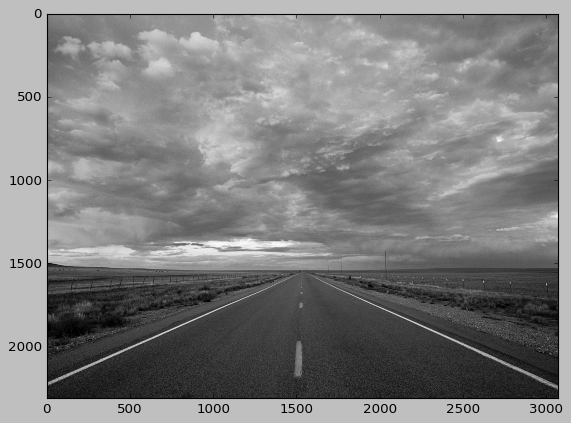

Imagen original: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2306 at 0x7FB0D7B6A4D0>


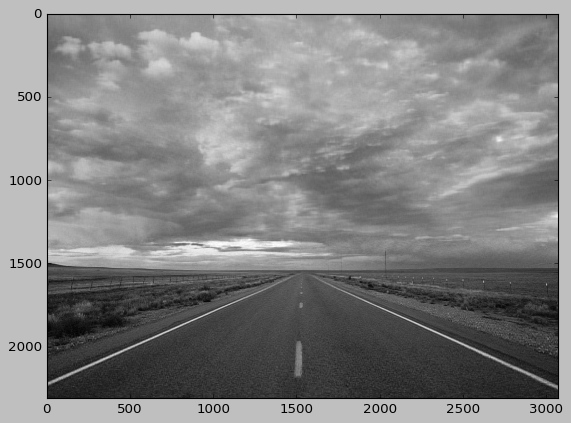

Imagen reconstruida con 120 valores: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2306 at 0x7FB0D7B6A4D0>


In [42]:
#imagen 2
img_2 = Image.open(urllib.request.urlopen('https://i.natgeofe.com/n/2a832501-483e-422f-985c-0e93757b7d84/6.jpg'))
reconstructImage(img_2, 120) # Random paths (clouds) are not easily compressed as the highway

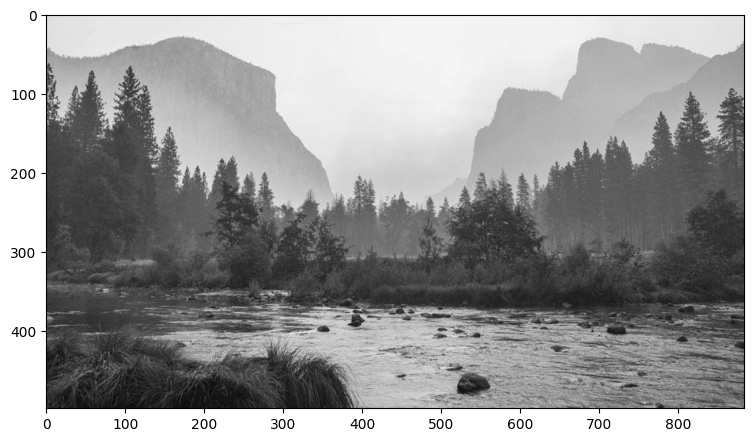

Imagen original: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=883x498 at 0x7FB0C321B0D0>


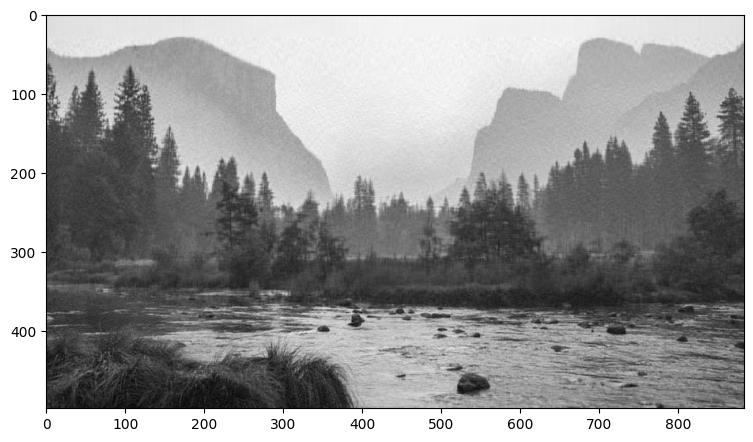

Imagen reconstruida con 110 valores: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=883x498 at 0x7FB0C321B0D0>


In [77]:
#imagen 3
img_3 = Image.open(urllib.request.urlopen('https://www.adorama.com/alc/wp-content/uploads/2018/11/landscape-photography-tips-yosemite-valley-feature.jpg'))
reconstructImage(img_3, 110) # Details are not easily reconsytructed (trees) but other bigger shapes are easily identified since 70 nvalues

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

In [60]:
X.shape

(150, 4)

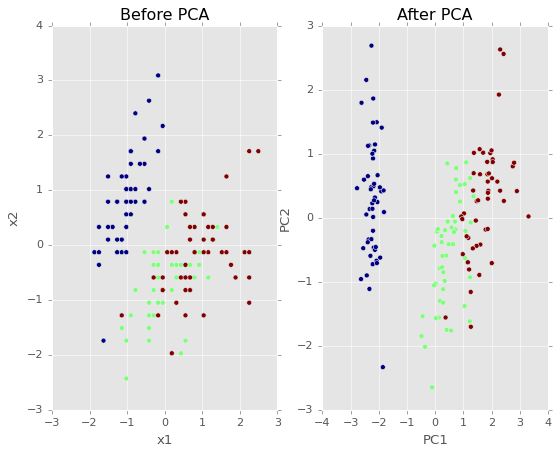

Variance explained: [0.72962445 0.22850762]


In [52]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

print(f"Variance explained: {pca.explained_variance_ratio_}")
# array([0.72962445, 0.22850762])

In [55]:
print(f"Covariance of reduced space:\n{np.cov(X_new.T)}\nExplained variance:\n{pca.explained_variance_}")

Covariance of reduced space:
[[2.93808505e+00 5.33928780e-16]
 [5.33928780e-16 9.20164904e-01]]
Explained variance:
[2.93808505 0.9201649 ]


In [56]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [57]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

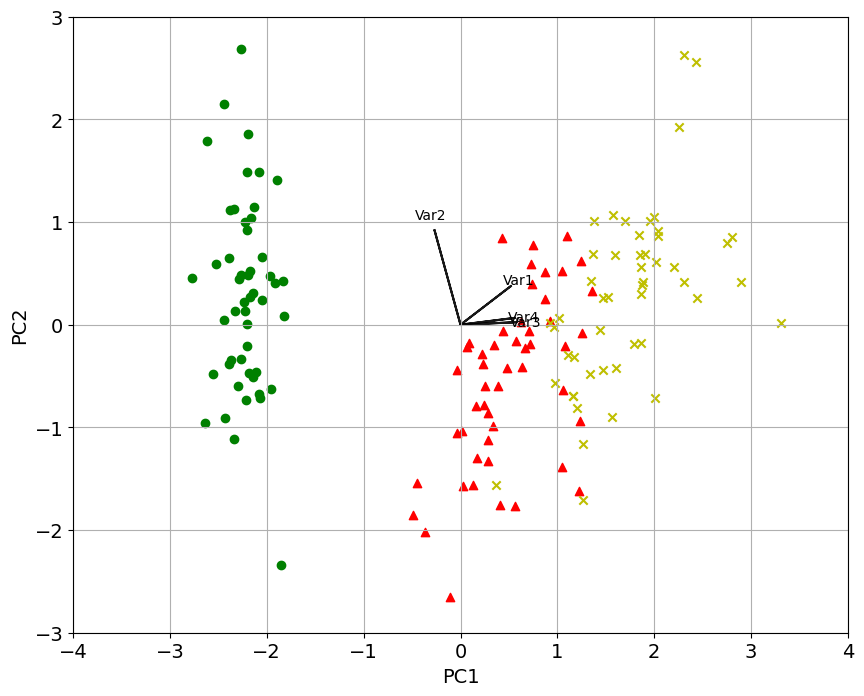

In [58]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [66]:
for i in range(4):
  for j in range(i+1, 4):
    print(f"Correlación entre variable {i+1} y {j+1}: {np.corrcoef(X[:, i], X[:, j])[1,0]:.2f}")

Correlación entre variable 1 y 2: -0.12
Correlación entre variable 1 y 3: 0.87
Correlación entre variable 1 y 4: 0.82
Correlación entre variable 2 y 3: -0.43
Correlación entre variable 2 y 4: -0.37
Correlación entre variable 3 y 4: 0.96


Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Al hacer la transformación de los datos con PCA se puede incrementar la varianza que existe entre ellos. En este caso esto significa incrementar la diferenciación entre ellos, por tanto resulta más sencillo separarlos.

Igualmente se pueden ver, a partir de los resultados del PCA que la primera componente PC1 es la que mayor varianza aporta (casi un 73%) de las cuales las variables 1, 3 y 4 son las que más aportan (valores máximos de alrededor de 0.5 para cada una).

Finalmente esto nos indica que están fuertemente correlacionadas, mientras que la variable 2 no lo está tanto con las demás, por tanto no es de tanta utilidad para separar las categorías e incrementar la varianza.

### Preguntas

##### ¿Qué es feature importance y para que nos sirve?

Una técnica que nos permite identificar cuáles de las variables tiene mayor importancia en cada una de las componentes principales identificadas. Es decir, cuáles aportan más información para generar dicha componente.

##### ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

La capacidad de comprimir una imagen con SVD y un número mucho menor de información que la original. Igualmente la capacidad de reducir las dimensiones de los conjuntos de datos en general, sin perder (en gran parte de los casos) la información más relevante al hacerlo. Es decir, podemos comprimir (o reducir) la información a sólo aquellas variables que más aporten.

##### ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

En uso y almacenamiento de imágenes definitivamente para el caso de SVD. Por otro lado es altamente relevante para cuando se está trabajando con conjuntos de datos con muchísimas variables, las cuales es necesario reducir de cantidad, ya sea para reducir la cantidad de información, o para tratar de reducir a únicamente las componentes principales que describen el comportamiento general de los datos. 

De igual manera PCA podría servir como una técnica para identificar las variables que mayor aportación y/o correlación tienen entre ellas para explicar las diferencias (varianza) entre los datos.